## **1. Phần mở đầu**

### **1.1. Mục lục**

* [1. Phần mở đầu]()
  * [1.1. Mục lục]()
  * [1.2. Giới thiệu chủ đề]()
  * [1.3. Khai báo thư viện cần thết và dữ liệu]()
* [2. Tiền xử lý dữ liệu]()
  * [1.1. Mục lục]()
  * [1.2. Giới thiệu chủ đề]()
  * [1.3. Khai báo thư viện cần thết và dữ liệu]()
* [3. Khai phá dữ liệu]()
  * [3.1. Quát dữ liệu]()
  * [3.2. Phân tích từng đặc trưng của dữ liệu]()   
    *   [3.2.1. Thể loại phim được xem nhiều nhất]()   
    *   [3.2.2. Top 10 đạo diễn ra nhiều phim nhất]()
    *   [3.2.3. Quốc gia ra nhiều phim nhất]()   
    *   [3.2.4. Tần suất ra phim cũng như xu hướng xem phim ở mỗi loại]()
    *   [3.2.5. Nhãn phim được xem nhiều nhất ở mỗi loại]()   
* [4. Tổng kết]()


### **1.2. Giới thiệu chủ để**

[NETFLIX](https://vi.wikipedia.org/wiki/Netflix) là nền tảng xem phim cũng như các chương trình truyền hình trực tiếp lớn nhất toàn cầu. Nền tảng này có khoảng 8k+ phim hay chương trình truyền hình có thể xem được vào giữa năm 2024. Họ có 282 triệu khách hàng trên toàn thế giới. Trong NoteBook này ta sẽ tìm hiểu sự gia tăng của nến tảng này đến từ đâu và hiểu về mối quan hệ giữa các đặc trưng tạo nên thành công của chúng

### **1.3. Khai báo thư viện cần thiết và dữ liệu**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv', index_col = 'show_id')

## **2. Tiền xử lý dữ liệu**

In [3]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 11)

* Dữ liệu gồm 8807 dòng
* Dữ liệu gồm 11 dòng

In [5]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* `type`: Thể loại phim
*  `title`: Tên phim trên Netflix
* `director`: Đạo diễn
* `cast`: Nhân vật chính
* `country`: Quốc gia
* `date_added`: Ngày thêm vào Netflix
* `release_year`: Năm ra mắt
* `rating`: Đánh giá
* `duration`: Thời lượng
* `listed_in`: Thể loại phim
* `description`: Tóm tắt

In [6]:
df.drop(['duration', 'listed_in', 'description', 'cast'], axis=1, inplace=True)

In [7]:
df.tail()

,type,title,director,country,date_added,release_year,rating
show_id,,,,,,,
s8803,Movie,Zodiac,David Fincher,United States,"November 20, 2019",2007,R
s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7
s8805,Movie,Zombieland,Ruben Fleischer,United States,"November 1, 2019",2009,R
s8806,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",2006,PG
s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14


In [8]:
df_totals_null = df.isnull().sum()
df_shape = df.shape
print((df_totals_null/df_shape[0])*100)

type             0.000000
title            0.000000
director        29.908028
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
dtype: float64


In [9]:
df.duplicated().sum()

0

* Có 2634 dữ liệu ở cột `director` bị thiếu chiếm 30%
* Có 831 dữ liệu ở cột `country` bị thiếu chiêm 10%
* Có 10 dữ liệu ở cột `date_added` bị thiếu không đáng kể
* Có 4 dữ liệu ở cột `rating` bị thiếu không đáng kể

In [10]:
df.fillna({'director': 'Unknown', 'country': 'Unknown'}, inplace=True)

* Chuyển đổi các kiểu dữ liệu bị thiéu thành 0

In [11]:
df.shape

(8807, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   country       8807 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8803 non-null   object
dtypes: int64(1), object(6)
memory usage: 550.4+ KB


In [13]:
df_fea = ['type', 'country', 'rating']
df_date = ['date_added']
df[df_fea] = df[df_fea].astype('category')
df[df_date] = df[df_date].astype('datetime64[ns]')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   category      
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   country       8807 non-null   category      
 4   date_added    8797 non-null   datetime64[ns]
 5   release_year  8807 non-null   int64         
 6   rating        8803 non-null   category      
dtypes: category(3), datetime64[ns](1), int64(1), object(2)
memory usage: 401.2+ KB


* Kiểm tra kiểu dữ liệu bị thiếu và chuyển dữ liệu về dạng thích hợp

## **3. Khai phá dữ liệu**

### **3.1. Khái quát dữ liệu**

In [15]:
df.describe(include = 'category')

,type,country,rating
count,8807,8807,8803
unique,2,749,17
top,Movie,United States,TV-MA
freq,6131,2818,3207


* Phim là thể loại được thêm nhiều nhát
* Mỹ là nước có nhiều phim nhất trên Netflix
* Tỷ lệ gắn nhãn nhiều nhát là TV-MA

### **3.2. Phân tích từng đặc trưng của dữ liệu**


#### **3.2.1. Thể loại được xem nhiều nhất**

<ipython-input-16-2fe8b030b494>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


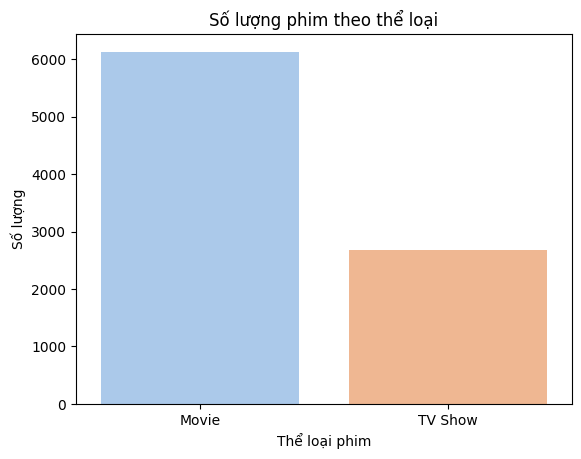

In [16]:
sns.countplot(x='type', data=df, palette='pastel')
plt.xlabel('Thể loại phim')
plt.ylabel('Số lượng')
plt.title('Số lượng phim theo thể loại')
plt.show()

* Ta có thể thấy rằng Phim nhiều hơn cả TV Show

#### **3.2.2. Top 10 đạo diễn ra nhiều phim nhất**

<ipython-input-17-f5e8d186070d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_director.index, x=df_director.values, palette='pastel')


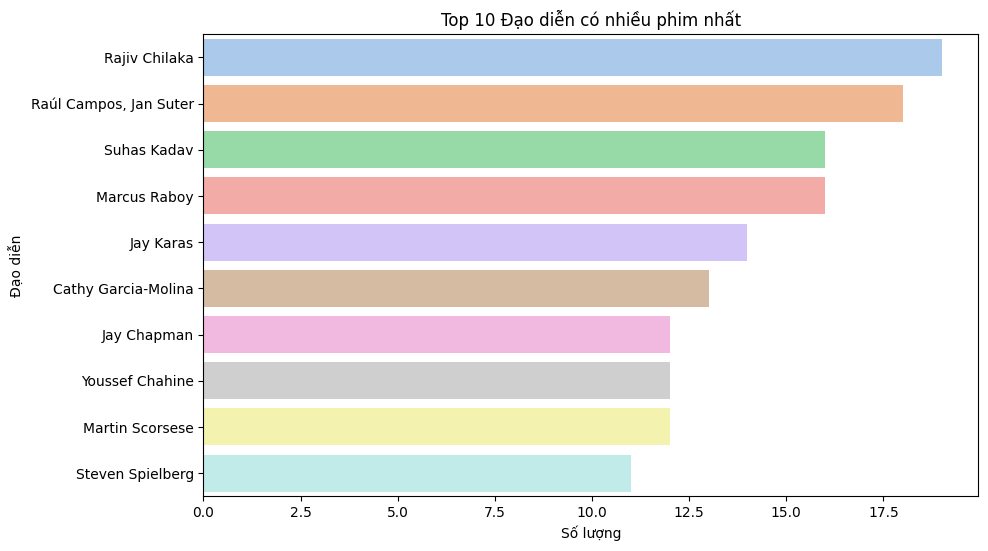

In [17]:
df_director = df[df['director'] != 'Unknown']
df_director = df_director.value_counts('director').head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=df_director.index, x=df_director.values, palette='pastel')
plt.ylabel('Đạo diễn')
plt.xlabel('Số lượng')
plt.title('Top 10 Đạo diễn có nhiều phim nhất')
plt.show()

* Có thể thấy đạo diễn có nhiều phim nhất là đạo diễn `Rajiv Chilaka` sau đố dần dân xếp theo là các đạo diễn khác

In [18]:
df.groupby([df['director'] == 'Rajiv Chilaka'])['type'].value_counts()

director  type   
False     Movie      6112
          TV Show    2676
True      Movie        19
          TV Show       0
Name: count, dtype: int64

* Đạo diễn này đến từ `Ấn Độ` và ông này thường làm phim dài

#### **3.1.3. Quốc gia có nhiều phim nhất**

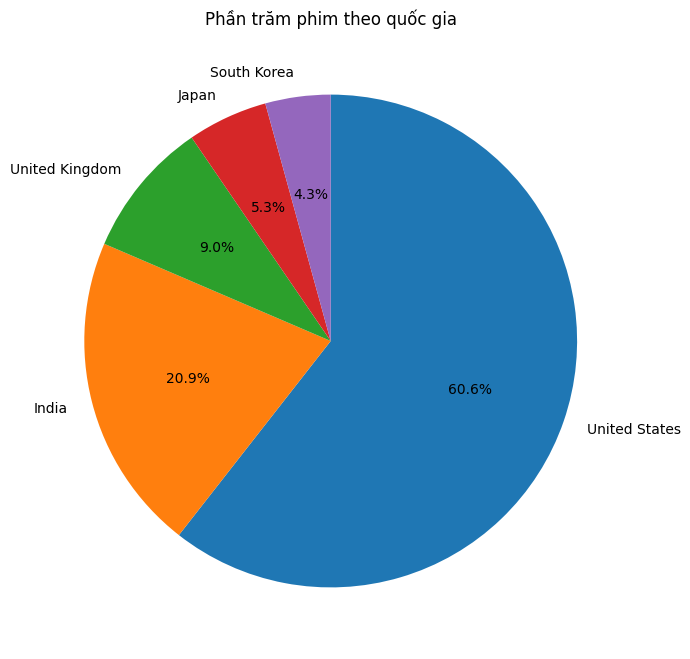

In [19]:
df_country = df[df['country'] != 'Unknown']
df_country = df_country.value_counts('country').head(5).sort_values(ascending=False)
plt.figure(figsize=(14, 8))
plt.pie(df_country.values, labels=df_country.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Phần trăm phim theo quốc gia')
plt.show()

Top 5 quốc gia có nhiều phim trên Netflix cao nhất kà Mỹ chiếm nhiều nhất

#### **3.2.4. Tần suất ra phim cũng như xu hướng cập nhật phim theo từng thể loại trên nền tảng**

In [20]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df.drop('date_added', axis=1, inplace=True)

In [21]:
df_year = df['year'].value_counts().head(5)

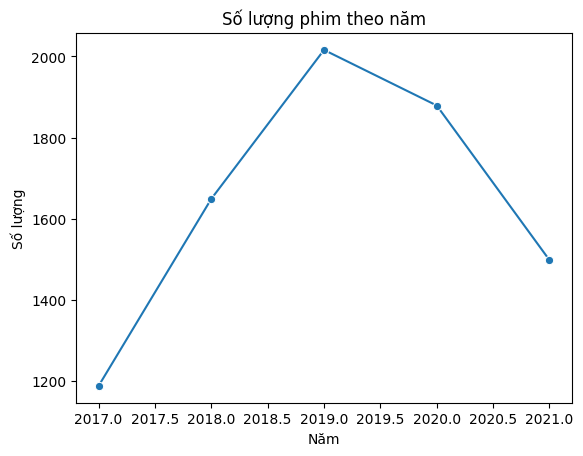

In [22]:
sns.lineplot(x=df_year.index, y=df_year.values, marker='o')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.title('Số lượng phim theo năm')
plt.show()

* Ta thấy rằng số lượng phim thêm vào Netflix có xu hướng tăng dần và đạt đỉnh vào năm 2019 có nghĩa rằng nền tảng này bắt đầu bùng nổ doanh thu vào năm 2019

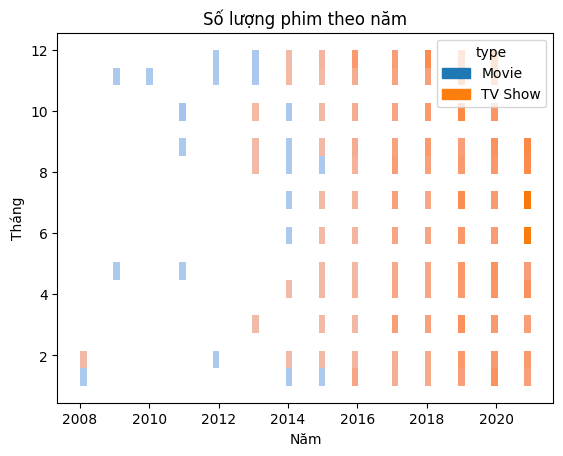

In [23]:
sns.histplot(x='year', y='month', hue = 'type', data = df)
plt.xlabel('Năm')
plt.ylabel('Tháng')
plt.title('Số lượng phim theo năm')
plt.show()

* Xu hướng trước các tháng tần suất khi thêm vào Netflix trước năm 2014 khá rời rạc chủ yếu là các dạng phim dài dần về sau thì họ co dổi mới bằng cách gia tăng các TV Show truyển hình

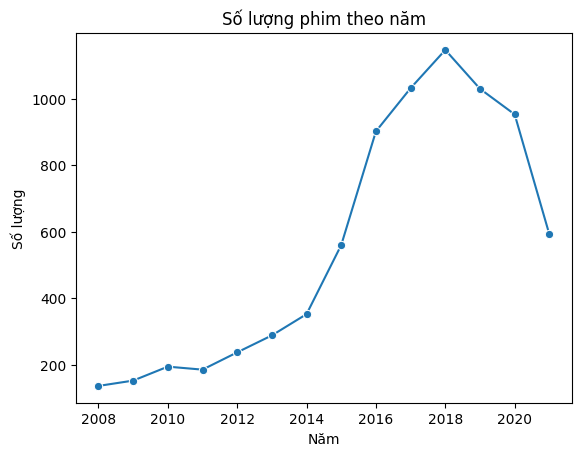

In [24]:
df_re_year = df[df['release_year'] >= 2008]
df_re_year = df_re_year.value_counts('release_year')
sns.lineplot(x=df_re_year.index, y=df_re_year.values, marker='o')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.title('Số lượng phim theo năm')
plt.show()

* Xu hướng ra mắt phim cũng tăng cao và đạt đỉnh trong khoảng năm 2019 với số lượng khoảng hơn 1000 phim và có lẽ vì thế mà nền tăng này cập nhật khá nhiều vào năm này

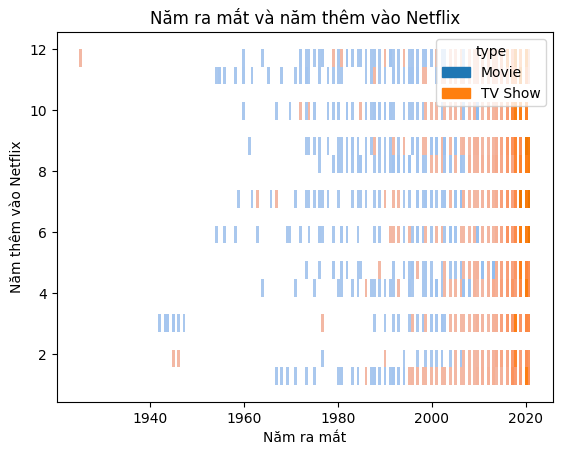

In [25]:
sns.histplot(x='release_year', y='month', hue = 'type', data = df)
plt.xlabel('Năm ra mắt')
plt.ylabel('Năm thêm vào Netflix')
plt.title('Năm ra mắt và năm thêm vào Netflix')
plt.show()

* Càng về sau những năm 2000 các TV Show chương trình truyền hình ra mẳt càng nhiều

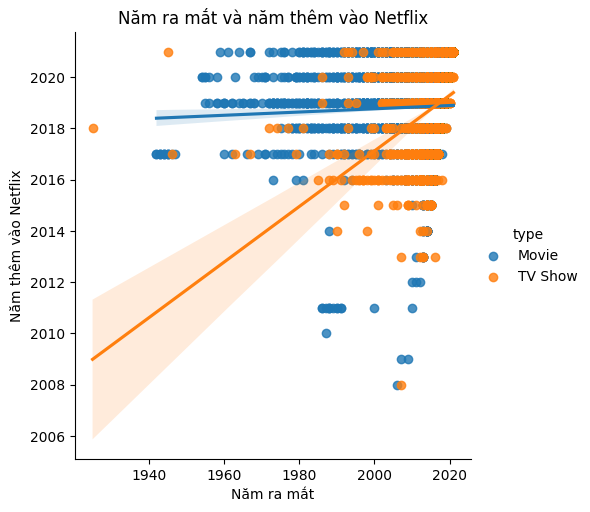

In [26]:
sns.lmplot(x = 'release_year', y = 'year', hue = 'type', data = df)
plt.xlabel('Năm ra mắt')
plt.ylabel('Năm thêm vào Netflix')
plt.title('Năm ra mắt và năm thêm vào Netflix')
plt.show()

* Thấy trên biểu đồ từ năm 2000 trở về sau chủ yếu là các chương trình TV Show  trước năm đó thì thường là các bộ phim dài tập và Netflix cũng hưởng ứng tần xuất ra TV Show và cũng liên tục cập nhât nhằm gia tăng doanh thu

#### **3.2.5. Nhãn phim được xem nhiều nhất ở mỗi loại**

<ipython-input-27-483e754205fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_rating.index, x=df_rating.values, palette='pastel')


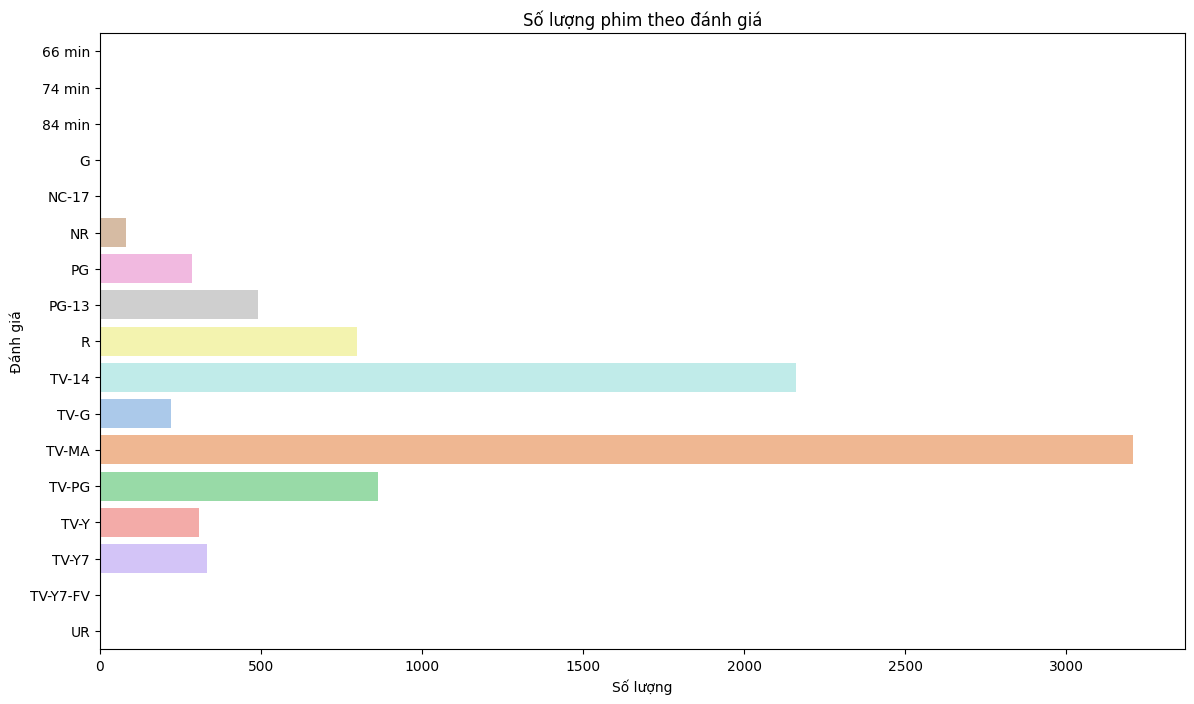

In [27]:
df_rating = df['rating'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(y=df_rating.index, x=df_rating.values, palette='pastel')
plt.ylabel('Đánh giá')
plt.xlabel('Số lượng')
plt.title('Số lượng phim theo đánh giá')
plt.show()

<ipython-input-28-76c64072db66>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('rating')['type'].value_counts()


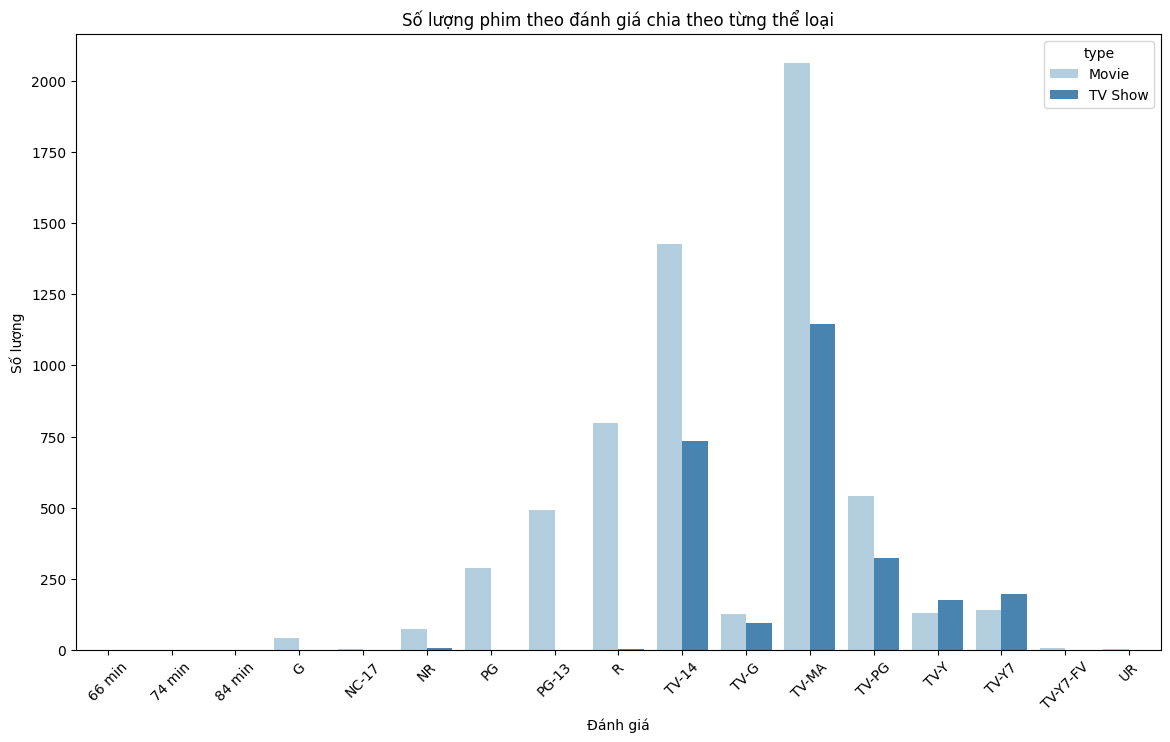

In [28]:
df.groupby('rating')['type'].value_counts()
plt.figure(figsize=(14, 8))
sns.countplot(x='rating', hue='type', data=df, palette='Blues')
plt.xlabel('Đánh giá')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.title('Số lượng phim theo đánh giá chia theo từng thể loại')
plt.show()

* Thể loại phổ biến nhất vẫn là thể loại có nhãn [TV_MA](https://en.wikipedia.org/wiki/TV_Parental_Guidelines)
* Khi ta chia thành 2 loại Phim dài hoặc TV Show kết quả cũng không khả quan khi cả hai thể loại này đều chiếm chú yếu là loại có gắn nhắn TV-MA cho và điều này cũng cho tháy phân khúc khách hàng mà Netflix nhắm vào phần lớn là người trường thành

## **4. Tổng kết**

* Qua bài phân tích trên ta có thể rút ra kết luận sau:
  * Doanh số của Netflix bùng nổ nhiều vào năm 2019 đa số là thuộc thể loại TV Show chương trình truyền hình là chủ yếu
  * Lượng khách hàng mà nền tảng này nhắm đến là người trường thành
  * Đa số phim không có đạo diễn ( Chúng minh do các phim có nguồn gốc từ Mỹ nhưng đạo diễn nhiều phim nhất thì lại đến từ Ấn Độ khá vô lý )
  * Càng về sau thì các nhà sản xuất, đạo diễn có xu hướng săn xuất các chương trình thực tế hơn là các bộ phim
  * Và nên tảng Netflix này chỉ mới cập nhật TV Show từ sau năm 2017 trước đó chỉ chủ yếu là các bộ phim dài tập